<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas as pd


In [4]:
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [34]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
"""
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

TASK 2
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

A = For the "Median value of owner-occupied homes" provide a boxplot

B = Provide a  bar plot for the Charles river variable

C = Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable
"""

'\n·      CRIM - per capita crime rate by town\n\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\n·      INDUS - proportion of non-retail business acres per town.\n\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\n·      NOX - nitric oxides concentration (parts per 10 million)\n\n·      RM - average number of rooms per dwelling\n\n·      AGE - proportion of owner-occupied units built prior to 1940\n\n·      DIS - weighted distances to five Boston employment centres\n\n·      RAD - index of accessibility to radial highways\n\n·      TAX - full-value property-tax rate per $10,000\n\n·      PTRATIO - pupil-teacher ratio by town\n\n·      LSTAT - % lower status of the population\n\n·      MEDV - Median value of owner-occupied homes in $1000\'s\n\nTASK 2\nFor all visualizations, please include a title in each graph and appropriate labels\n\nGenerate the following and explain your findings:\n\nFor the "Median value of owner

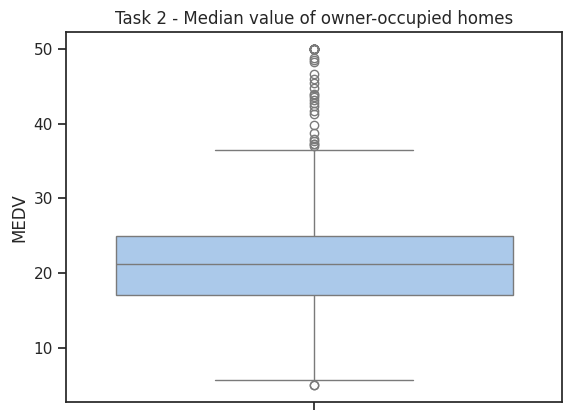

In [28]:
#For the "Median value of owner-occupied homes" provide a boxplot
import seaborn as sns

box = sns.boxplot(y="MEDV",data=boston_df, showfliers=True).set_title("Task 2 - Median value of owner-occupied homes")
#box.set(xlabel ='boxplot', ylable = 'MEDV')

Text(0.5, 1.0, 'Task 2 - Provide a  bar plot for the Charles river variable')

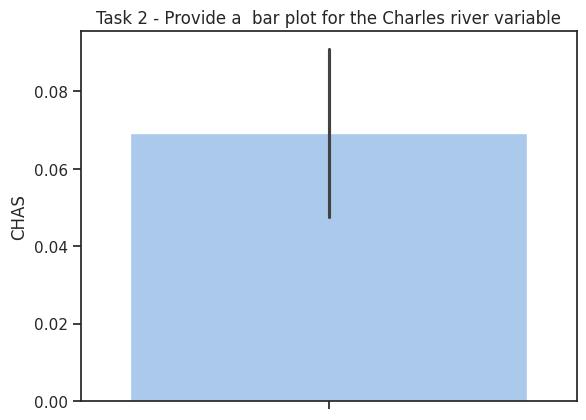

In [36]:
#Provide a  bar plot for the Charles river variable
sns.barplot(boston_df, y="CHAS").set_title("Task 2 - Provide a  bar plot for the Charles river variable")


Text(0.5, 1.0, 'Task 2 - Provide a boxplot for the MEDV variable vs the AGE variable')

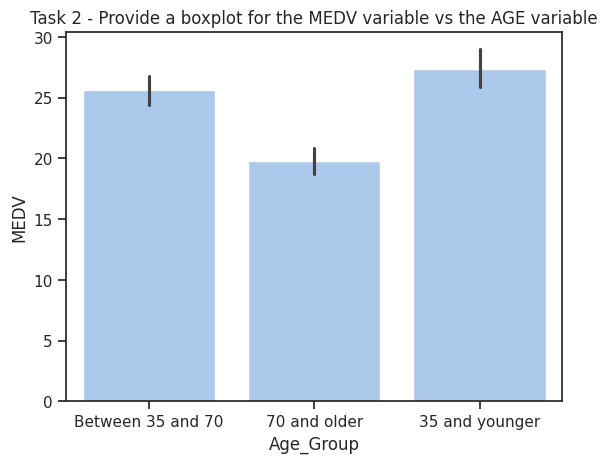

In [43]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

sns.barplot(boston_df, x="Age_Group", y='MEDV').set_title("Task 2 - Provide a boxplot for the MEDV variable vs the AGE variable")

Text(0.5, 1.0, 'Provide a scatter plot to show the relationship between Nitric oxideconcentrations = NOX and the proportion of non-retail business acres per town. = INDUS')

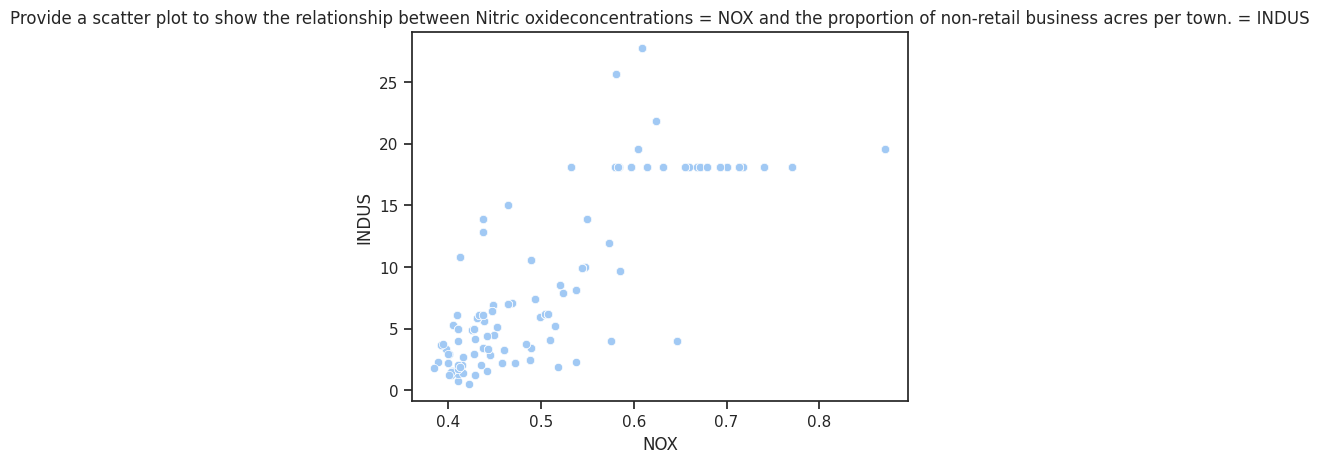

In [50]:
#Provide a scatter plot to show the relationship between Nitric oxide  concentrations = NOX
#and the proportion of non-retail business acres per town. = INDUS
#What can you say about the relationship?

sns.scatterplot(x="NOX",
                y="INDUS",
                data=boston_df
               ).set_title("Provide a scatter plot to show the relationship between Nitric oxideconcentrations = NOX and the proportion of non-retail business acres per town. = INDUS")

#conclusion not connected 

Text(0.5, 1.0, 'Create a histogram for the pupil to teacher ratio variable PTRATIO')

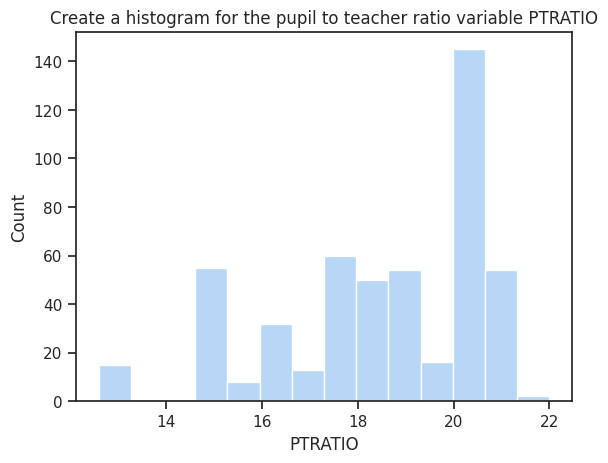

In [52]:
#Create a histogram for the pupil to teacher ratio variable PTRATIO
sns.histplot(data=boston_df, x="PTRATIO"
            ).set_title("Create a histogram for the pupil to teacher ratio variable PTRATIO")



"""
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.
"""


In [54]:
#Is there a significant difference in median value of houses bounded by the Charles river or not
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [55]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis 
(H0= here is no difference in median value of houses bounded by the Charles river)
as there is enough proof that there is a
statistical difference in in median value of houses bounded by the Charles river

In [56]:
#Is there a difference in Median values of houses (MEDV) 
#for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [57]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [58]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)


F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [59]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less than 0.05, we reject the Null hypothesis ( There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town)and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [64]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model_result = sm.OLS(y, X).fit()
predictions = model_result.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        17:45:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than 0.05, we reject the Null hypothesis ((There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

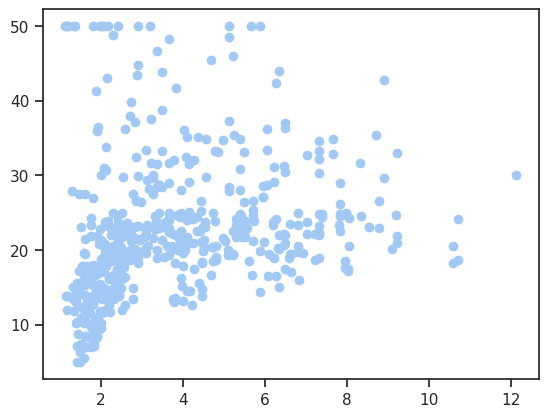

In [63]:
import matplotlib.pyplot as plt

plt.scatter(x=boston_df['DIS'], y=boston_df['MEDV'])
plt.show()